In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


<h1>從這開始

In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
app_train.shape

(307511, 122)

In [12]:
print ('a') 
#計算任意欄位的平均數及標準差:
app_train['AMT_INCOME_TOTAL'].describe()

a


count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

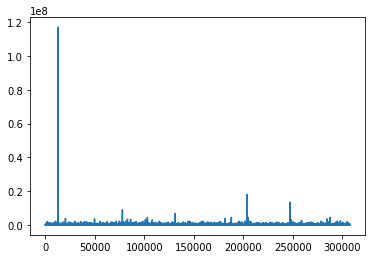

In [7]:
app_train['AMT_INCOME_TOTAL'].plot()
#發現有一極端值

In [8]:
#找出其上圖的極端值的row資料
app_train.iloc[np.argmax(app_train['AMT_INCOME_TOTAL'])]

E:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


SK_ID_CURR                                           114967
TARGET                                                    1
NAME_CONTRACT_TYPE                               Cash loans
CODE_GENDER                                               F
FLAG_OWN_CAR                                              N
FLAG_OWN_REALTY                                           Y
CNT_CHILDREN                                              1
AMT_INCOME_TOTAL                                   1.17e+08
AMT_CREDIT                                           562491
AMT_ANNUITY                                         26194.5
AMT_GOODS_PRICE                                      454500
NAME_TYPE_SUITE                               Unaccompanied
NAME_INCOME_TYPE                                    Working
NAME_EDUCATION_TYPE           Secondary / secondary special
NAME_FAMILY_STATUS                                  Married
NAME_HOUSING_TYPE                         House / apartment
REGION_POPULATION_RELATIVE              

In [9]:
np.max(app_train['AMT_INCOME_TOTAL'])

117000000.0

In [14]:
gender=app_train.groupby('CODE_GENDER')

In [15]:
app_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [20]:
#女生中有無車的比例
app_train['FLAG_OWN_CAR'][app_train['CODE_GENDER']=='F'].value_counts()/np.sum(app_train['CODE_GENDER']=='F')

N    0.777923
Y    0.222077
Name: FLAG_OWN_CAR, dtype: float64

In [21]:
#男生中有無車的比例
app_train['FLAG_OWN_CAR'][app_train['CODE_GENDER']=='M'].value_counts()/np.sum(app_train['CODE_GENDER']=='M')

Y    0.567548
N    0.432452
Name: FLAG_OWN_CAR, dtype: float64

In [22]:
#可發現男生有車的比率比女生高近一倍